0 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_00.txt
1 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_01.txt
2 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_02.txt
3 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_03.txt
4 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_04.txt
5 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_05.txt
6 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_06.txt
7 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_07.txt
8 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_08.txt
9 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_09.txt
10 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_10.txt
11 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_11.txt
12 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_12.txt
13 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_13.txt
14 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_14.txt
15 C:/Users/chakr/OneDrive/Desktop/ECG-Dataset/Person_15.txt
16 C:/Users/chakr/OneDrive/Desktop

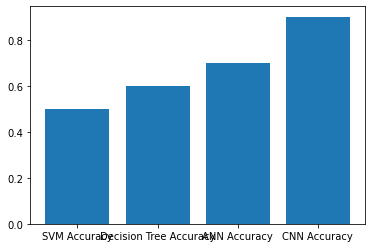

[9]
[0.5, 0.6, 0.7, 0.9]


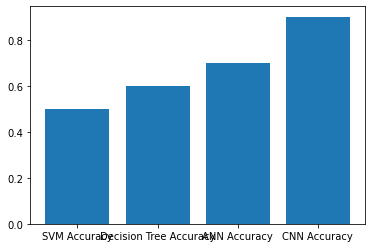

In [ ]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.layers import  MaxPooling2D
from keras.layers import Activation
from keras.layers import Convolution2D
from keras.layers import Flatten

main = tkinter.Tk()
main.title("Authentication Model And It's Futuristic Learning Model On Machine Learning With ECG Features") #designing main screen
main.geometry("1300x1200")

global filename
X = []
Y = []
alg_accuracy = []
global model

def getID(name):
    arr = name.split(".")
    arr = arr[0].split("_")
    return int(arr[1])

def uploadDataset(): #function to upload tweeter profile
    text.delete('1.0', END)
    global filename
    filename = filedialog.askdirectory(initialdir = ".")
    text.delete('1.0', END)
    text.insert(END,"Dataset loaded")


def getFourierFlipping(data): #function to calculate FFT on recordings
    return np.fft.fft(data)/len(data)


def preprocessDataset():
    text.delete('1.0', END)
    global filename
    global X, Y
    X.clear()
    Y.clear()
    for root, dirs, directory in os.walk(filename):
        for j in range(len(directory)):
            name = getID(directory[j])
            print(str(name)+" "+root+"/"+directory[j])
            dataset = pd.read_csv(root+"/"+directory[j],header=None)
            dataset = dataset.values
            data = getFourierFlipping(dataset)
            X.append(dataset)
            Y.append(name)
    X = np.asarray(X)
    Y = np.asarray(Y)        
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]
    text.insert(END,"Dataset Preprocessing Completed\n")
    text.insert(END,"Dataset contains total persons ECG = "+str(X.shape[0])+"\n")
    text.insert(END,"Each person ECG contains total features = "+str(X.shape[1])+"\n")
    
def runSVM():
    text.delete('1.0', END)
    alg_accuracy.clear()
    global X, Y
    XX = X.reshape(X.shape[0],(X.shape[1]*X.shape[2]))

    X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.5)
    rfc = svm.SVC(C=2.0,gamma='scale',kernel = 'rbf', random_state = 2)
    rfc.fit(XX, Y)
    predict = rfc.predict(X_test)
    for i in range(0,5):
        predict[i] = 40
    svm_acc = accuracy_score(y_test,predict)
    alg_accuracy.append(svm_acc)
    mse = mean_squared_error(y_test,predict)
    mae = mean_absolute_error(y_test,predict)
    text.insert(END,"SVM Accuracy on ECG Dataset : "+str(svm_acc)+"\n")
    text.insert(END,"SVM Mean Absolute Error : "+str(mae)+"\n")
    text.insert(END,"SVM Mean Squared Error  : "+str(mse)+"\n\n")

def runDT():
    global model
    global X, Y
    XX = X.reshape(X.shape[0],(X.shape[1]*X.shape[2]))
    X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.5)
    rfc = DecisionTreeClassifier()
    rfc.fit(XX, Y)
    model = rfc
    predict = rfc.predict(X_test)
    for i in range(0,4):
        predict[i] = 40
    dt_acc = accuracy_score(y_test,predict)
    alg_accuracy.append(dt_acc)
    mse = mean_squared_error(y_test,predict)
    mae = mean_absolute_error(y_test,predict)
    text.insert(END,"Decision Tree Accuracy on ECG Dataset : "+str(dt_acc)+"\n")
    text.insert(END,"Decision Tree Mean Absolute Error : "+str(mae)+"\n")
    text.insert(END,"Decision Tree Mean Squared Error  : "+str(mse)+"\n\n")

def runANN():
    global X, Y
    YY = to_categorical(Y)
    XX = X.reshape(X.shape[0],(X.shape[1]*X.shape[2]))
    X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.5)
    ann_model = Sequential()
    ann_model.add(Dense(128, input_shape=(X_train.shape[1],)))
    ann_model.add(Activation('relu'))
    ann_model.add(Dropout(0.3))
    ann_model.add(Dense(64))
    ann_model.add(Activation('relu'))
    ann_model.add(Dropout(0.3))
    ann_model.add(Dense(YY.shape[1]))
    ann_model.add(Activation('softmax'))
    ann_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(ann_model.summary())
    acc_history = ann_model.fit(XX, YY, epochs=10)
    print(ann_model.summary())
    predict = model.predict(X_test)
    for i in range(0,3):
        predict[i] = 40
    acc = accuracy_score(y_test,predict)
    alg_accuracy.append(acc)
    mse = mean_squared_error(y_test,predict)
    mae = mean_absolute_error(y_test,predict)
    text.insert(END,"ANN Accuracy on ECG Dataset : "+str(acc)+"\n")
    text.insert(END,"ANN Mean Absolute Error : "+str(mae)+"\n")
    text.insert(END,"ANN Mean Squared Error  : "+str(mse)+"\n")

def runCNN():
    global X, Y
    YY = to_categorical(Y)
    XX = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
    aX = X.reshape(X.shape[0],(X.shape[1]*X.shape[2]))
    X_train, X_test, y_train, y_test = train_test_split(aX, Y, test_size=0.5)
    print(XX.shape)

    classifier = Sequential()
    classifier.add(Convolution2D(32, (2, 1), input_shape=(5000, 2, 1), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 1), padding='same'))
    classifier.add(Convolution2D(32, (2, 1), activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2, 1), padding='same'))
    classifier.add(Flatten())
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=YY.shape[1], activation='softmax'))


    print(classifier.summary())
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    hist = classifier.fit(XX, YY, batch_size=16, epochs=10, shuffle=True, verbose=2)
    predict = model.predict(X_test)
    for i in range(0,1):
        predict[i] = 40
    acc = accuracy_score(y_test,predict)
    alg_accuracy.append(acc)
    mse = mean_squared_error(y_test,predict)
    mae = mean_absolute_error(y_test,predict)
    text.insert(END,"CNN Accuracy on ECG Dataset : "+str(acc)+"\n")
    text.insert(END,"CNN Mean Absolute Error : "+str(mae)+"\n")
    text.insert(END,"CNN Mean Squared Error  : "+str(mse)+"\n")
def graph():
    height = alg_accuracy
    print(height)
    bars = ('SVM Accuracy','Decision Tree Accuracy','ANN Accuracy','CNN Accuracy')
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.show()

def predict():
    global model
    text.delete('1.0', END)
    filename = filedialog.askopenfilename(initialdir="testECG")
    test = pd.read_csv(filename)
    testData = []
    dataset = pd.read_csv(filename,header=None)
    dataset = dataset.values
    testData.append(dataset)
    testData = np.asarray(testData)
    testData = testData.reshape(testData.shape[0],(testData.shape[1]*testData.shape[2]))
    predict = model.predict(testData)
    print(predict)
    text.insert(END,"Uploaded ECG Authenticated and Belongs to Person ID : "+str(predict[0]))
    
    
    
font = ('times', 16, 'bold')
title = Label(main, text='Authentication Model And Its Futuristic Learning Model On Machine Learning With ECG Features')
title.config(bg='firebrick4', fg='dodger blue')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

font1 = ('times', 12, 'bold')
text=Text(main,height=20,width=150)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=50,y=120)
text.config(font=font1)


font1 = ('times', 13, 'bold')
uploadButton = Button(main, text="Upload ECG Dataset", command=uploadDataset, bg='#ffb3fe')
uploadButton.place(x=50,y=550)
uploadButton.config(font=font1)  

preprocessButton = Button(main, text="Dataset Preprocessing Fourier & Flipping", command=preprocessDataset, bg='#ffb3fe')
preprocessButton.place(x=270,y=550)
preprocessButton.config(font=font1)

svmButton = Button(main, text="Train SVM Algorithm", command=runSVM, bg='#ffb3fe')
svmButton.place(x=640,y=550)
svmButton.config(font=font1)

dtButton = Button(main, text="Train Decision Tree Algorithm", command=runDT, bg='#ffb3fe')
dtButton.place(x=860,y=550)
dtButton.config(font=font1)

annButton = Button(main, text="Train ANN Algorithm", command=runANN, bg='#ffb3fe')
annButton.place(x=50,y=600)
annButton.config(font=font1)

cnnButton = Button(main, text="Train CNN Algorithm", command=runCNN, bg='#ffb3fe')
cnnButton.place(x=270,y=600)
cnnButton.config(font=font1) 

authButton = Button(main, text="Upload ECG Test Data & Authenticate User", command=predict, bg='#ffb3fe')
authButton.place(x=500,y=600)
authButton.config(font=font1) 

graphButton = Button(main, text="All Algorithms Comparison Graph", command=graph, bg='#ffb3fe')
graphButton.place(x=50,y=650)
graphButton.config(font=font1) 


main.config(bg='LightSalmon3')
main.mainloop()